In [9]:
# 正则化

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [11]:
print(np.max(x_train), np.min(x_train))

255 0


In [12]:
print(x_train.reshape(-1, 1).shape)

(43120000, 1)


In [13]:
#通过sklearn的标准化进行处理
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
# 先reshape变为二维（相当于1列）的目的是对每一个像素点进行标准化（让其等价）
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
# 验证集用的也是训练集的均值和方差
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
# 测试集
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [14]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [16]:
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8892 - accuracy: 0.7067 - val_loss: 0.6106 - val_accuracy: 0.7946
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5720 - accuracy: 0.7996 - val_loss: 0.5186 - val_accuracy: 0.8218
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5079 - accuracy: 0.8198 - val_loss: 0.4798 - val_accuracy: 0.8338
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.8324 - val_loss: 0.4567 - val_accuracy: 0.8416
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4502 - accuracy: 0.8395 - val_loss: 0.4399 - val_accuracy: 0.8496
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4328 - accuracy: 0.8468 - val_loss: 0.4251 - val_accuracy: 0.8510
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4190 - accuracy: 0.8507 - val_loss: 0.4142 - val_accuracy:

In [17]:
print(type(history.history))
print(history.history)

<class 'dict'>
{'loss': [0.8891944885253906, 0.5720195174217224, 0.5078689455986023, 0.47303706407546997, 0.4501884877681732, 0.43283697962760925, 0.41900578141212463, 0.40752479434013367, 0.39830929040908813, 0.38959893584251404, 0.3821693956851959, 0.37541842460632324, 0.3692367970943451, 0.3639506697654724, 0.3583492040634155, 0.3535769283771515, 0.34902000427246094, 0.3446715176105499, 0.34096530079841614, 0.33690279722213745], 'accuracy': [0.706709086894989, 0.7995636463165283, 0.8198000192642212, 0.8323636651039124, 0.8395090699195862, 0.8467817902565002, 0.850745439529419, 0.8554545640945435, 0.8591272830963135, 0.861090898513794, 0.864581823348999, 0.8668909072875977, 0.8689454793930054, 0.8712363839149475, 0.87298184633255, 0.8747818470001221, 0.8756181597709656, 0.8780909180641174, 0.8791818022727966, 0.8800727128982544], 'val_loss': [0.6106095910072327, 0.5185838937759399, 0.47983622550964355, 0.45673155784606934, 0.4399296045303345, 0.4250944256782532, 0.41415640711784363, 

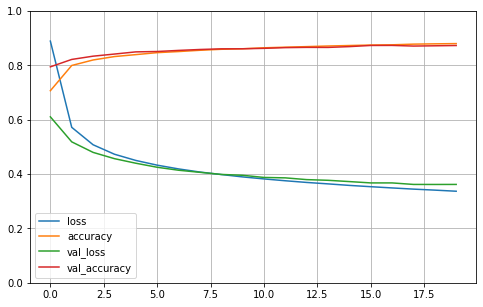

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3920561373233795, 0.8590999841690063]